<a href="https://colab.research.google.com/github/danielmrios/Methodologies-of-Data-Science/blob/main/image_classification_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Purpose

Our goal with this notebook is to develop an image classification algorithm that classifies images into one of at least two categories.

## Import Libraries

In [149]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import glob

## Our Question

We'll be using a Pokemon image dataset to train a model to classify the 3 different Eevee evolutions; Flareon, Jolteon, and Vaporeon. This is a fairly shallow dataset with ~50 images per Pokemon, we'll consider this limitation in developing the model and interpeting results.

The dataset is sourced from Kaggle: https://www.kaggle.com/datasets/lantian773030/pokemonclassification

## Import Data

Let's start by importing our data.

I've imported it into a Drive folder, it can be accessed here: https://drive.google.com/drive/folders/1eoko1M_LWa9xy0xqSkOfK0Na0DVpVMXz?usp=sharing

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set path and find pokemon folders inside

In [174]:
import os

# Define the base path to the image dataset
base_path = "/content/drive/MyDrive/pokemon"

# List the contents of the base path to check the folder names
print("Contents of the base directory:")
for item in os.listdir(base_path):
    item_path = os.path.join(base_path, item)
    if os.path.isdir(item_path):
        print(f"Folder: {item}")
    else:
        print(f"File: {item}")

Contents of the base directory:
Folder: Flareon
Folder: Jolteon
Folder: Vaporeon


Now let's extract the images from the folder and make sure it looks good.

In [175]:
# Function to extract JPG images from a folder
def extract_images(folder_path):
    # Use glob to get all JPG files in the folder
    jpg_files = glob.glob(os.path.join(folder_path, "*.jpg"))
    return jpg_files

# List the contents of the base path and extract JPG images from each folder
print("Contents of the base directory:")
for item in os.listdir(base_path):
    item_path = os.path.join(base_path, item)
    if os.path.isdir(item_path):
        print(f"Folder: {item}")
        jpg_images = extract_images(item_path)
        print(f"JPG images: {jpg_images}")
    else:
        print(f"File: {item}")

Contents of the base directory:
Folder: Flareon
JPG images: ['/content/drive/MyDrive/pokemon/Flareon/000c906f3ce24e43851a2528865039ad.jpg', '/content/drive/MyDrive/pokemon/Flareon/9763e0ae1bbf44b7b0a7bc7838f193c9.jpg', '/content/drive/MyDrive/pokemon/Flareon/23f57c80ee784b63b23e4cea6cd6f454.jpg', '/content/drive/MyDrive/pokemon/Flareon/c3d6d6a0f23345a8a0cda47cb5c8744f.jpg', '/content/drive/MyDrive/pokemon/Flareon/eb4b6891ed11438da3c4f6aee4f92d7c.jpg', '/content/drive/MyDrive/pokemon/Flareon/89f4129bc69943a89b1dfeacb7c2671c.jpg', '/content/drive/MyDrive/pokemon/Flareon/40d5c9b51fa44d9a81cc8999eba4a727.jpg', '/content/drive/MyDrive/pokemon/Flareon/be225280047343d8b13ebd1c7ec62c97.jpg', '/content/drive/MyDrive/pokemon/Flareon/ffb969e0d6954d2d9c1c41faa49d4e01.jpg', '/content/drive/MyDrive/pokemon/Flareon/a096133ec1e94783997bd9cc6c844af9.jpg', '/content/drive/MyDrive/pokemon/Flareon/576029ba60ed49e38c4885ff794fcbff.jpg', '/content/drive/MyDrive/pokemon/Flareon/3bc7a357194f4b78b5387319bcd984

Looks good. Let's re-size the images to 128x128 and display a few to get an idea of what we're working with.

In [176]:
# Function to resize an image to a fixed size
def resize_image(image_path, size=(128, 128)):
    img = Image.open(image_path)
    img_resized = img.resize(size, Image.LANCZOS)
    return img_resized

# Function to display images in a grid
def display_images(images, labels, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, num_images//2, i+1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()


Loading and resizing images from each species folder:
Found folder for species: Flareon
Found folder for species: Jolteon
Found folder for species: Vaporeon


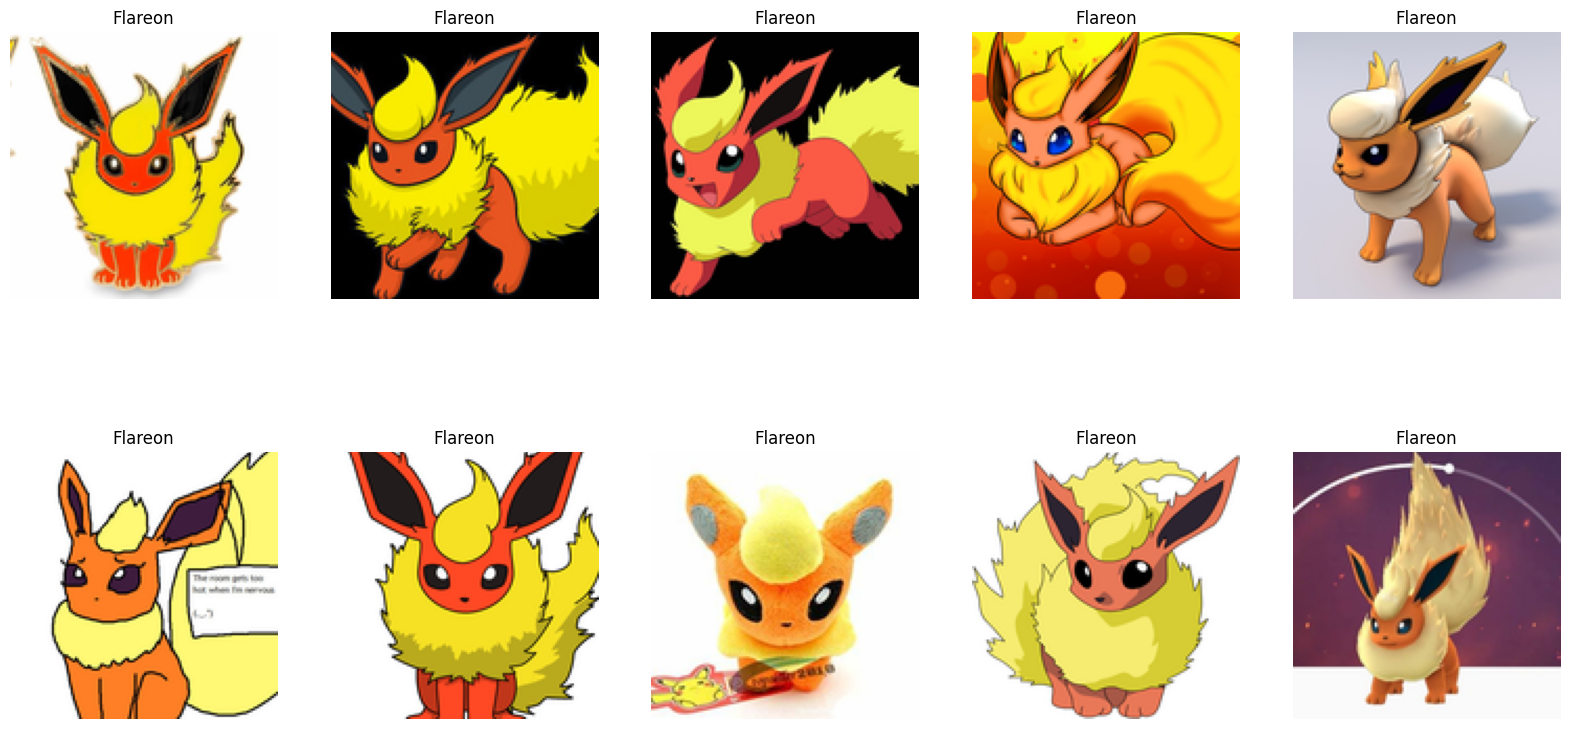

In [177]:
# Initialize lists to hold images and labels
images = []
labels = []

# Load and resize images from each species folder
print("\nLoading and resizing images from each species folder:")
for species in os.listdir(base_path):
    species_folder = os.path.join(base_path, species)
    if os.path.isdir(species_folder):
        print(f"Found folder for species: {species}")
        image_files = [f for f in os.listdir(species_folder) if f.endswith(".jpg")]
        if image_files:
            for image_file in image_files:
                image_path = os.path.join(species_folder, image_file)
                img_resized = resize_image(image_path)

                # Convert image to array and append to list
                img_array = np.array(img_resized)
                images.append(img_array)
                labels.append(species)
        else:
            print(f"No images found for {species}")
    else:
        print(f"No folder found for {species}")

display_images(images, labels)

## Pre-processing

Now we'll do some image classification pre-processing

Convert to arrays and make a train-test split

In [155]:
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Create train-test split
train_X, test_X, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Flatten the images to 1D

In [156]:
X_train = train_X.reshape(train_X.shape[0], -1)
X_test = test_X.reshape(test_X.shape[0], -1)

print('X_train:', X_train.shape)
print('Y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('Y_test:', y_test.shape)

X_train: (124, 49152)
Y_train: (124,)
X_test: (31, 49152)
Y_test: (31,)


In [157]:
from keras.datasets import mnist

Convert string to integer labels

In [158]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the string labels into integer labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Print the unique integer labels
y_train
y_test

array([1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 2])

Normalize the data

In [160]:
# Normalize the data
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

## Logistic regression

Let's start by seeing how well a logistic regression model can classify our 3 images

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 77.42%
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.67      0.83      0.74        12
           2       1.00      1.00      1.00         9

    accuracy                           0.77        31
   macro avg       0.79      0.78      0.78        31
weighted avg       0.78      0.77      0.77        31



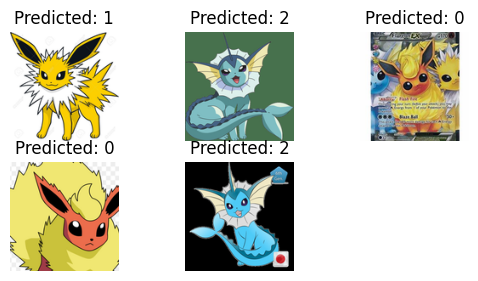

In [162]:
# Initialize the logistic regression model
model = LogisticRegression(
    fit_intercept=True,
    multi_class='auto',
    penalty='l2',
    solver='saga',
    max_iter=150,
    C=50
)

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

77% accuracy, not bad.

Plot some test images with their predicted labels

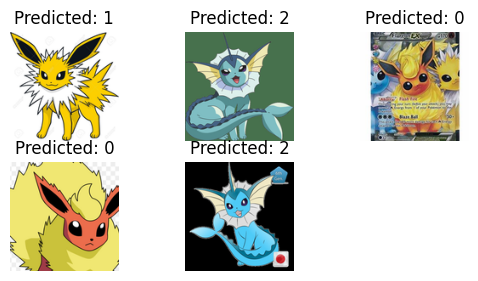

In [178]:
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(test_X[i], cmap=plt.get_cmap('gray'))
    plt.title(f"Predicted: {y_pred[i]}")
    plt.axis('off')
plt.show()

## Neural Network

We'll now create our Neural Network using Keras

In [163]:
!pip install keras_tuner

Import Libraries

In [164]:
import os
import numpy as np
import json
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from kerastuner.tuners import BayesianOptimization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Define the model-building function

In [165]:
def define_model(units, num_layers, activation, lr, l2):
    model_layers = [
        layers.Dense(units, activation=activation, kernel_regularizer=regularizers.L2(l2=l2), kernel_initializer=keras.initializers.HeNormal())
    ] * num_layers
    model_layers += [layers.Dense(3, activation='softmax')]  # Output layer with 3 classes for Pokémon
    model = keras.Sequential(model_layers)
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'],
                  optimizer=keras.optimizers.Adam(learning_rate=lr))
    return model

Define the model-building function for hyperparameter tuning

In [166]:
def build_model(hp):
    units = hp.Choice("units", [256, 512])
    activation = "relu"
    lr = hp.Float("lr", min_value=1e-5, max_value=1e-1, sampling="log")
    l2 = hp.Float("l2", min_value=1e-5, max_value=1e-1, sampling="log")
    num_layers = hp.Choice("num_layers", [3]) # three layers

    # call existing model-building code with the hyperparameter values
    model = define_model(units=units, num_layers=num_layers, activation=activation, lr=lr, l2=l2)
    return model

Perform hyperparameter tuning

In [167]:
tuner = BayesianOptimization(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=8,
    executions_per_trial=1,
    overwrite=False,
    directory="/content/drive/MyDrive/model2/pokemon_classification",
)

# Define early stopping callback
callbacks = [EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True, start_from_epoch=4)]

Reloading Tuner from /content/drive/MyDrive/model2/pokemon_classification/untitled_project/tuner0.json


Hyperparameter search with early stopping callback

In [168]:
# Perform hyperparameter search
tuner.search(
    X_train_norm,
    y_train,
    epochs=8,
    verbose=1,
    validation_data=(X_test_norm, y_test),
    callbacks=callbacks
)

# Print summary of results
tuner.results_summary(5)  # Print the top 5 models

Results summary
Results in /content/drive/MyDrive/model2/pokemon_classification/untitled_project
Showing 5 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
units: 512
lr: 8.751750687111834e-05
l2: 7.881803848409081e-05
num_layers: 3
Score: 0.6457132697105408

Trial 1 summary
Hyperparameters:
units: 256
lr: 0.00010704277430560486
l2: 0.0014718060571766677
num_layers: 3
Score: 1.2448179721832275

Trial 5 summary
Hyperparameters:
units: 512
lr: 0.00040988636796602444
l2: 0.0006971880555223669
num_layers: 3
Score: 2.602339744567871

Trial 3 summary
Hyperparameters:
units: 256
lr: 0.000421325083295368
l2: 0.007151587905306393
num_layers: 3
Score: 4.219910621643066

Trial 0 summary
Hyperparameters:
units: 256
lr: 0.007590359240299584
l2: 0.010285330840692853
num_layers: 3
Score: 63.409767150878906


Trial 2 was our best model with a value loss of 0.65. We'll now Make predictions on the test set and return results

In [171]:
best_trial_num = "2" # best trial number

# Load the trial hyperparameters and weights
with open(f"/content/drive/MyDrive/model2/pokemon_classification/untitled_project/trial_{best_trial_num}/trial.json", "r") as f:
    trial = json.load(f)

hp = trial["hyperparameters"]["values"]
model = define_model(units=hp["units"], num_layers=hp["num_layers"], activation="relu", lr=hp["lr"], l2=hp["l2"])
model.load_weights(f"/content/drive/MyDrive/model2/pokemon_classification/untitled_project/trial_{best_trial_num}/checkpoint")

# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test_norm), axis=1)

# Compute the confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = sum(y_pred == y_test) / len(y_test)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)

1/1 [==============================] - 1s 505ms/step
Accuracy: 0.7419354838709677
Confusion Matrix:
[[ 4  6  0]
 [ 1 11  0]
 [ 0  1  8]]


Print the classification report

In [172]:
# Assuming model.predict returns probabilities, convert them to class labels
y_pred = np.argmax(model.predict(X_test_norm), axis=1)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print(classification_report(y_test, y_pred))

1/1 [==============================] - 0s 89ms/step
Accuracy: 74.19%
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.61      0.92      0.73        12
           2       1.00      0.89      0.94         9

    accuracy                           0.74        31
   macro avg       0.80      0.74      0.74        31
weighted avg       0.78      0.74      0.73        31



The model had 74.2% accuracy. It fared best at preciting Vaporeon (3) and Jolteon (2), but often incorrectly predicted Flareon (1) as Jolteon. This could be because of Flareon and Jolteon's similar color (Jolteon is yellow and Flareon red, on the other hand Vaporeon is blue) and their similarities in visible features.

Considering the sample size and differentating between 3 features, the model fared well in classifying our images.